# Plant Disease Prediction

## Importing Dataset

## Importing libraries

In [2]:
import tensorflow as tf
from tensorflow.keras import models, utils, optimizers
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, BatchNormalization
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import json
from zipfile import ZipFile
from PIL import Image
from IPython.display import HTML


In [4]:
# kaggle_credentails = json.load(open("kaggle.json"))

# os.environ["KAGGLE_USERNAME"] = kaggle_credentails["username"]
# os.environ["KAGGLE_KEY"] = kaggle_credentails["key"]

# !kaggle datasets download -d shaharshh/plant-disease-detection-dataset

# with ZipFile("plant-disease-detection-dataset.zip", 'r') as zip_ref:
#     zip_ref.extractall()

# !rm "plant-disease-detection-dataset.zip"


100% 1.34G/1.34G [00:16<00:00, 94.7MB/s]
100% 1.34G/1.34G [00:16<00:00, 85.3MB/s]


## Data Preprocessing

### Training Image preprocessing

In [5]:
training_set = utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)


Found 70295 files belonging to 38 classes.


### Validation Image Preprocessing

In [6]:
validation_set = utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)


Found 17572 files belonging to 38 classes.


In [7]:
class_names = training_set.class_names
class_names


['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

#### To avoid Overshooting Loss function
1. Choose small learning rate default 0.001 here we have taken 0.0001
2. There may be chance of underfitting so increase number of neuron
3. Add more Convolutional Layer to extract more feature from images there may be possibilty that model unable to capture relevant feature or model is confusing due to lack of feature so feed with more feature

## Building Model

In [8]:
cnn = models.Sequential()

cnn.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(MaxPool2D(pool_size=2,strides=2))
cnn.add(Dropout(0.25))

cnn.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(MaxPool2D(pool_size=2,strides=2))

cnn.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(MaxPool2D(pool_size=2,strides=2))
cnn.add(Dropout(0.25))

cnn.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(MaxPool2D(pool_size=2,strides=2))

cnn.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(MaxPool2D(pool_size=2,strides=2))
cnn.add(Dropout(0.25))

cnn.add(Flatten())
cnn.add(Dense(units=1500,activation='relu'))
cnn.add(Dropout(0.4))

cnn.add(Dense(units=38,activation='softmax'))


In [9]:
cnn.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 64, 64, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 32, 32, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        3

In [11]:
cnn.compile(optimizer=optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])


In [12]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)


Epoch 1/10
2197/2197 [==============================] - 100s 42ms/step - loss: 3.1408 - accuracy: 0.2565 - val_loss: 1.7032 - val_accuracy: 0.5414
Epoch 2/10
2197/2197 [==============================] - 96s 44ms/step - loss: 1.2873 - accuracy: 0.6100 - val_loss: 0.9296 - val_accuracy: 0.7374
Epoch 3/10
2197/2197 [==============================] - 96s 43ms/step - loss: 0.8169 - accuracy: 0.7457 - val_loss: 0.6005 - val_accuracy: 0.8271
Epoch 4/10
2197/2197 [==============================] - 94s 43ms/step - loss: 0.5806 - accuracy: 0.8159 - val_loss: 0.4272 - val_accuracy: 0.8710
Epoch 5/10
2197/2197 [==============================] - 87s 39ms/step - loss: 0.4503 - accuracy: 0.8553 - val_loss: 0.3506 - val_accuracy: 0.8907
Epoch 6/10
2197/2197 [==============================] - 86s 39ms/step - loss: 0.3677 - accuracy: 0.8816 - val_loss: 0.3170 - val_accuracy: 0.9007
Epoch 7/10
2197/2197 [==============================] - 86s 39ms/step - loss: 0.3059 - accuracy: 0.9003 - val_loss: 0.2917 

## Evaluating Model

In [13]:
# Training Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)


2197/2197 [==============================] - 54s 24ms/step - loss: 0.1681 - accuracy: 0.9456
Training accuracy: 0.945600688457489


In [14]:
# Validation Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)


550/550 [==============================] - 14s 25ms/step - loss: 0.2447 - accuracy: 0.9218
Validation accuracy: 0.9218074083328247


### Saving Model

In [16]:
cnn.save('trained_plant_disease_model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [15]:
training_history.history


{'loss': [3.140812397003174,
  1.2873371839523315,
  0.8169260025024414,
  0.5805803537368774,
  0.4503343999385834,
  0.3677460849285126,
  0.30594602227211,
  0.26704904437065125,
  0.23291030526161194,
  0.2033473551273346],
 'accuracy': [0.2564762830734253,
  0.6100434064865112,
  0.7457144856452942,
  0.8159470558166504,
  0.8552812933921814,
  0.8816416263580322,
  0.9003058671951294,
  0.9121132493019104,
  0.922995924949646,
  0.9332953691482544],
 'val_loss': [1.7032170295715332,
  0.9295629262924194,
  0.6005110144615173,
  0.42720478773117065,
  0.3505869209766388,
  0.31696170568466187,
  0.291706383228302,
  0.27927806973457336,
  0.2013757973909378,
  0.24474461376667023],
 'val_accuracy': [0.5414295196533203,
  0.737366259098053,
  0.8271113038063049,
  0.8710448145866394,
  0.8907352685928345,
  0.9006943106651306,
  0.9068973660469055,
  0.9111654758453369,
  0.9359776973724365,
  0.9218074083328247]}

In [17]:
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)


In [18]:
print(training_history.history.keys())


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


## Visualising results

In [19]:
acc = training_history.history['accuracy']
val_acc = training_history.history['val_accuracy']
loss = training_history.history['loss']
val_loss = training_history.history['val_loss']


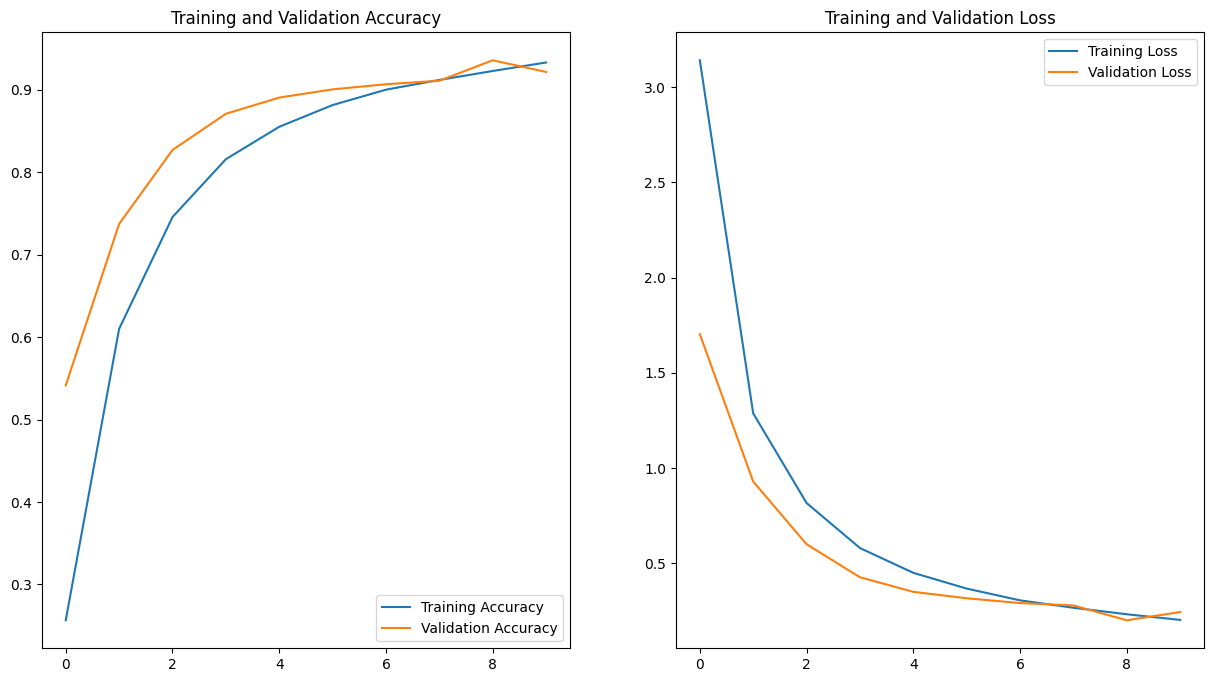

In [20]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.plot(range(10), acc, label='Training Accuracy')
plt.plot(range(10), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(10), loss, label='Training Loss')
plt.plot(range(10), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


## Model evaluation

In [21]:
class_name = validation_set.class_names


In [22]:
len(class_name)


38

In [23]:
test_set = utils.image_dataset_from_directory(
    'test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)


Found 760 files belonging to 38 classes.


In [24]:
# Predicted

y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)
predicted_categories


24/24 [==============================] - 2s 89ms/step


<tf.Tensor: shape=(760,), dtype=int64, numpy=
array([ 0,  5,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  7,  0,
        0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  2,  2,  2, 28,  2,  2,  2,  2, 35,  2,  2,
        2,  2,  2,  2,  2, 29,  2,  2,  2, 34,  3,  3,  3, 28,  3,  3,  3,
        3,  3, 21,  3, 29,  3,  3,  3,  3,  3,  3,  3,  4, 13,  4,  4,  4,
        4,  4,  4,  4, 27,  4,  4,  4, 34,  4,  4,  4,  4,  4,  4,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  3,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  9,  7,  7,  7,
        9,  7,  7, 20,  7,  7,  7,  8,  8,  8,  8,  8,  8,  7,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  7,  9,  9,  9, 25, 25, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 25, 10, 25, 25, 10,

In [25]:
# Actual

true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)
Y_true


<tf.Tensor: shape=(760,), dtype=int64, numpy=
array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,

In [26]:
len(Y_true)


760

In [27]:
len(predicted_categories)


760

## Precision Recall Fscore

In [28]:
from sklearn.metrics import confusion_matrix,classification_report


In [29]:
# Precision Recall Fscore
print(classification_report(Y_true, predicted_categories, target_names=class_name))


                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       1.00      0.90      0.95        20
                                 Apple___Black_rot       1.00      1.00      1.00        20
                          Apple___Cedar_apple_rust       1.00      0.85      0.92        20
                                   Apple___healthy       0.94      0.80      0.86        20
                               Blueberry___healthy       1.00      0.85      0.92        20
          Cherry_(including_sour)___Powdery_mildew       0.90      0.95      0.93        20
                 Cherry_(including_sour)___healthy       1.00      1.00      1.00        20
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.85      0.85      0.85        20
                       Corn_(maize)___Common_rust_       1.00      0.95      0.97        20
               Corn_(maize)___Northern_Leaf_Blight       0.90      0.95      0.

In [30]:
HTML("""
<img src="https://www.researchgate.net/publication/336402347/figure/fig3/AS:812472659349505@1570719985505/Calculation-of-Precision-Recall-and-Accuracy-in-the-confusion-matrix.ppm" />
""")


### Confusion Matrix Visualization

In [31]:
cm = confusion_matrix(Y_true, predicted_categories)


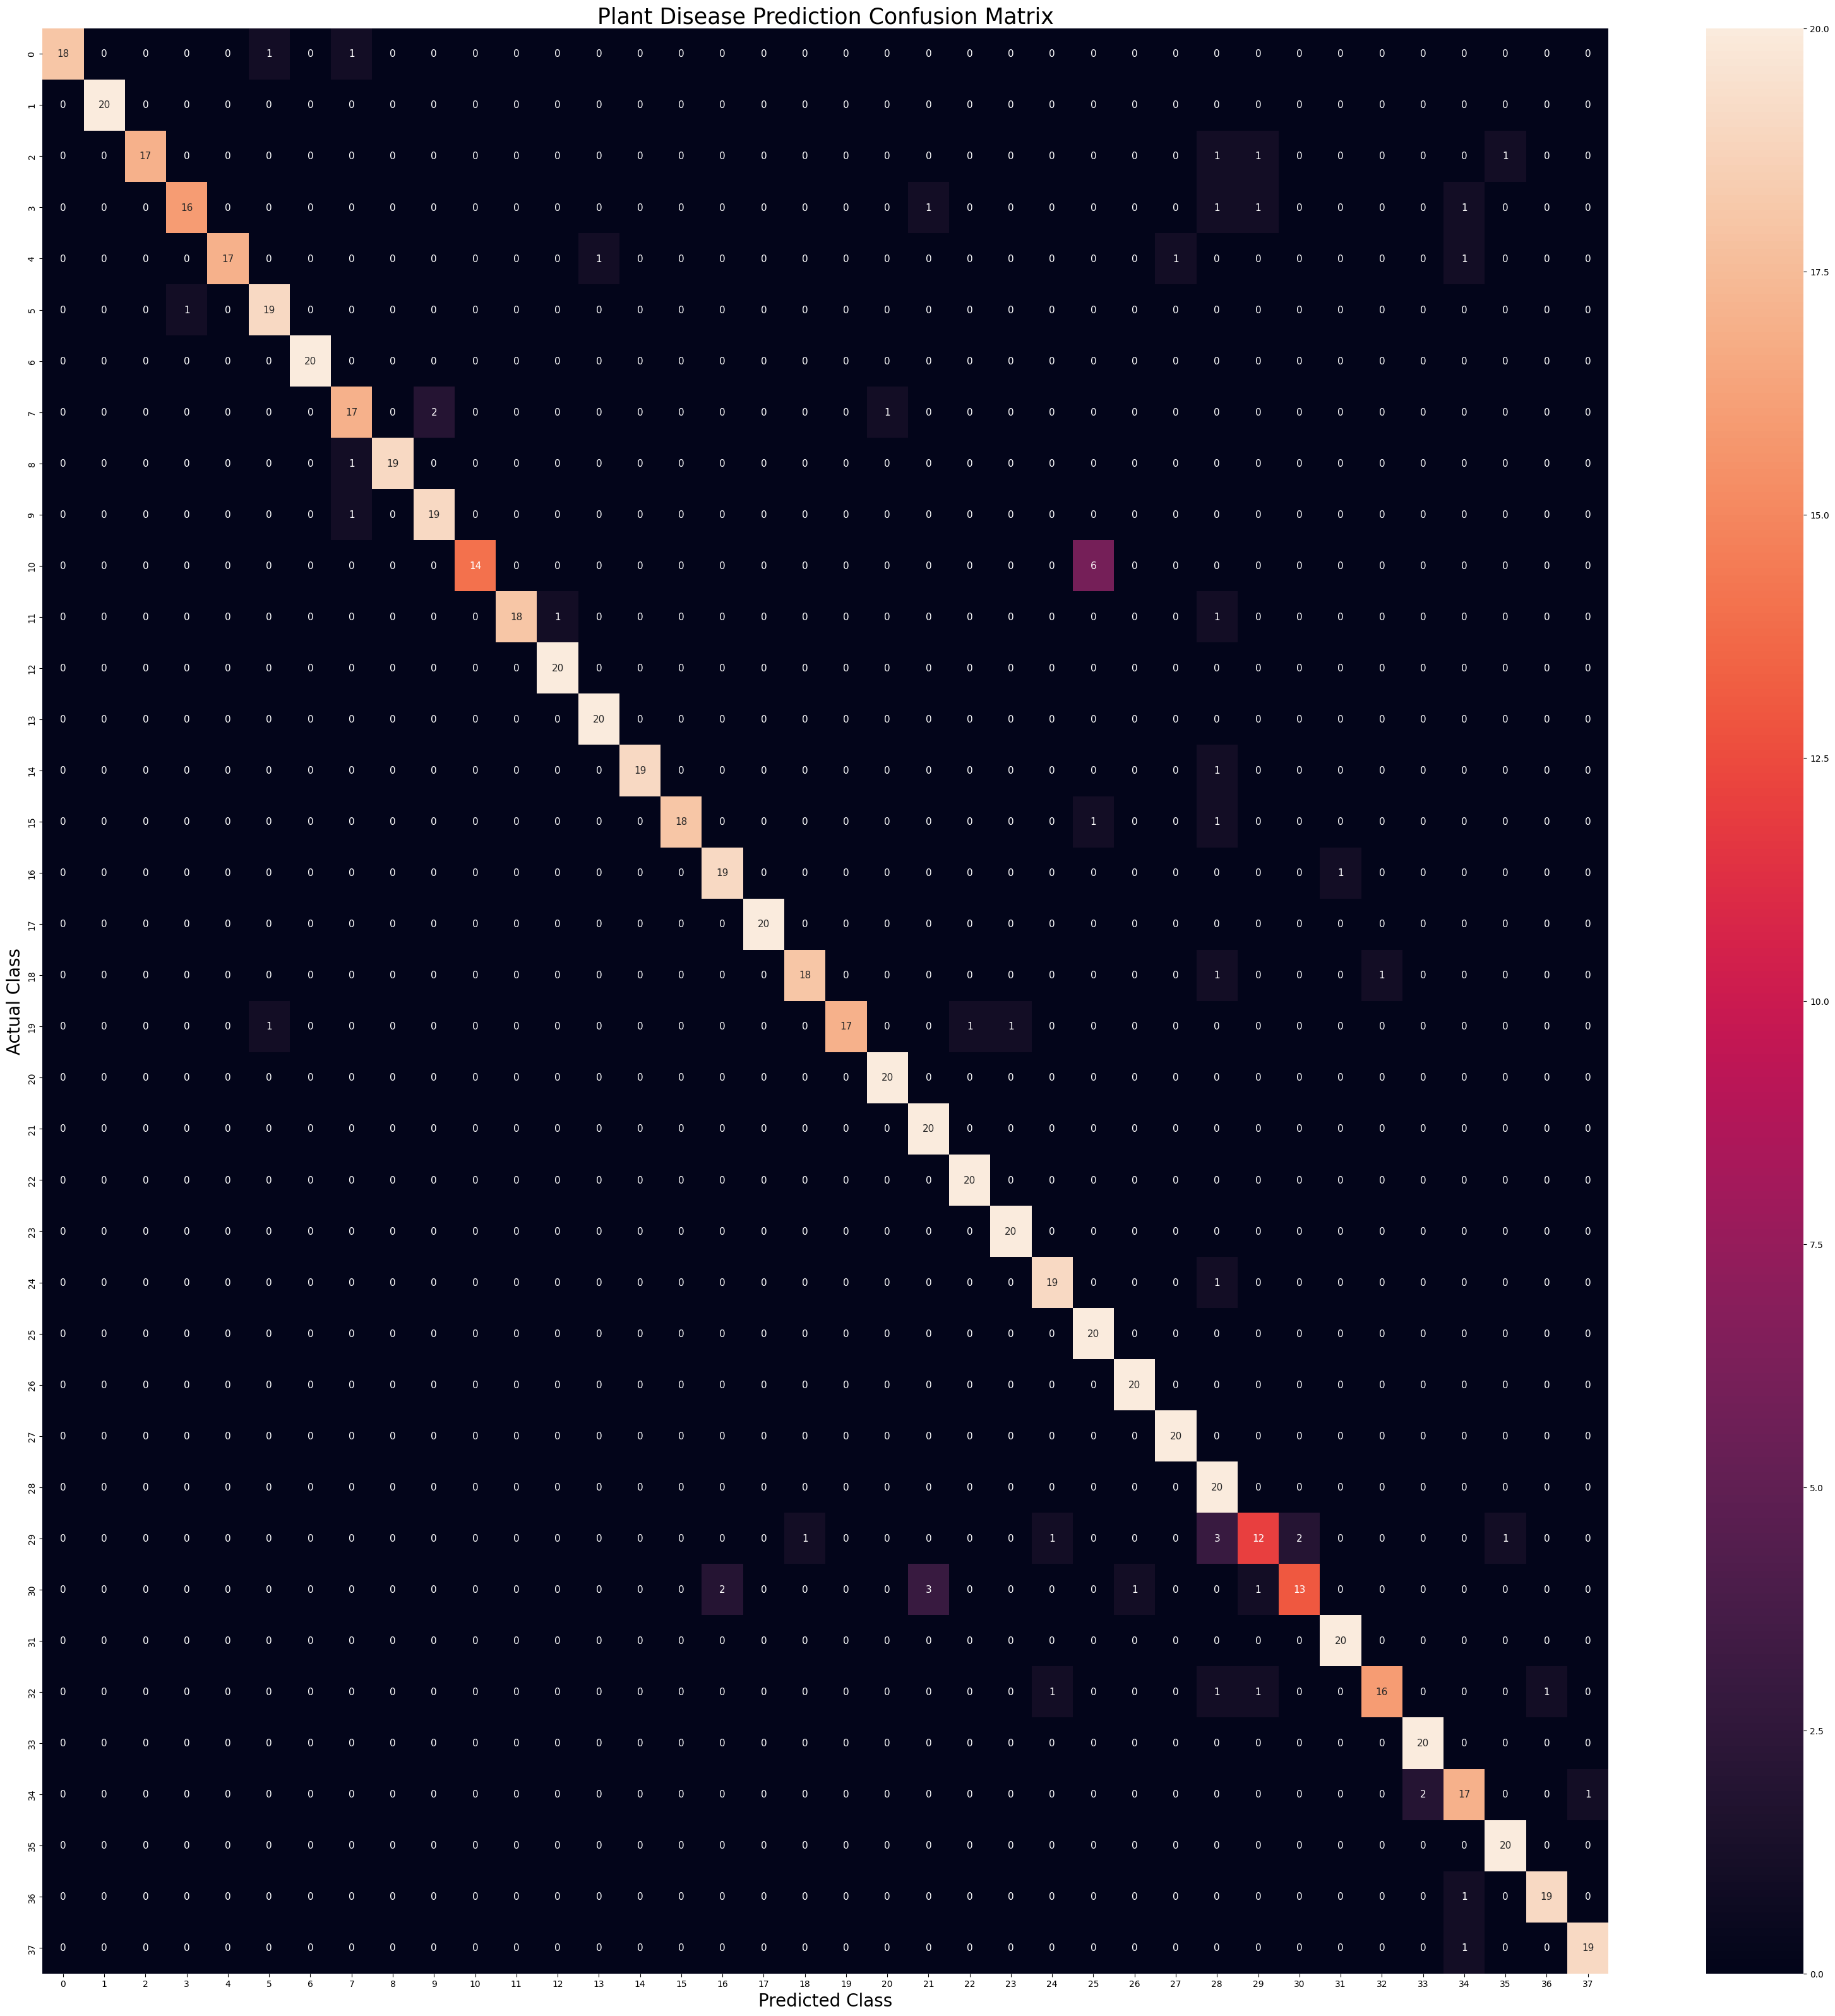

In [32]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 11})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()
